In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

In [42]:
from sklearn.datasets import load_linnerud

linnerud = load_linnerud()
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [43]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [44]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
               pd.DataFrame(linnerud.target, columns=linnerud.target_names)], axis=1)
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


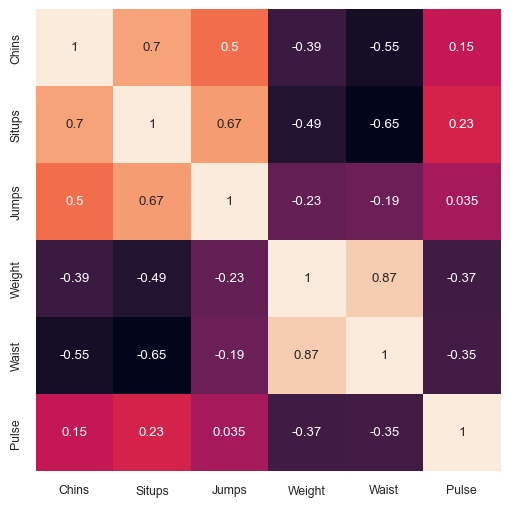

In [45]:
df_corr = df.corr()

plt.figure(figsize=(6, 6))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [46]:
# too low correlation between Jumps and Pulse

X = df
X = X.drop(columns=['Jumps','Pulse'], axis=1)

y = df['Pulse']

In [47]:
X

,Chins,Situps,Weight,Waist
0,5.0,162.0,191.0,36.0
1,2.0,110.0,189.0,37.0
2,12.0,101.0,193.0,38.0
3,12.0,105.0,162.0,35.0
4,13.0,155.0,189.0,35.0
5,4.0,101.0,182.0,36.0
6,8.0,101.0,211.0,38.0
7,6.0,125.0,167.0,34.0
8,15.0,200.0,176.0,31.0
9,17.0,251.0,154.0,33.0


In [48]:
y

0     50.0
1     52.0
2     58.0
3     62.0
4     46.0
5     56.0
6     56.0
7     60.0
8     74.0
9     56.0
10    50.0
11    52.0
12    64.0
13    50.0
14    46.0
15    62.0
16    54.0
17    52.0
18    54.0
19    68.0
Name: Pulse, dtype: float64

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

def showGraph(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [50]:
#RNN Model

from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense
from keras.optimizers import Adam    

def buildRNNModel():
    model = Sequential()

    model.add(SimpleRNN(8, activation="relu", input_shape=(4,1)))
    model.add(Dense(4,activation='relu'))
    model.add(Dense(1))
    model.compile(Adam(learning_rate=0.02), loss = 'mse', metrics = ['mae'])
    return model

model = buildRNNModel()
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_12 (SimpleRNN)   (None, 8)                 80        
                                                                 
 dense_26 (Dense)            (None, 4)                 36        
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
# To prevent cheating, standardize after dividing full dataset into train, val, test dataset
def standardize(train, val, test):
    
    train_mean = np.mean(train, axis = 0)
    train_std = np.std(train, axis = 0)

    X_train = (train - train_mean) / train_std
    X_val = (val - train_mean) / train_std
    X_test = (test - train_mean) / train_std
    
    return [X_train, X_val, X_test]

In [52]:
# change dataframe into numpy narray

X = X.values
y = y.values


[1th Fold progress]
Epoch 1/100
4/4 [==============================] - 2s 144ms/step - loss: 3163.7979 - mae: 55.7043 - val_loss: 3085.2219 - val_mae: 55.2417
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 3041.7234 - mae: 54.6109 - val_loss: 2819.0439 - val_mae: 52.7746
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 2724.0876 - mae: 51.7145 - val_loss: 2242.0300 - val_mae: 46.8981
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 2057.0520 - mae: 44.5565 - val_loss: 1073.1211 - val_mae: 31.3233
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 833.9756 - mae: 25.0248 - val_loss: 310.7783 - val_mae: 14.9004
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 492.1887 - mae: 16.3943 - val_loss: 1322.9270 - val_mae: 31.3296
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 380.3653 - mae: 15.7310 - val_loss: 179.2263 - val_mae: 12.8072
Epoch 8/100
4/4 [

Epoch 62/100
4/4 [==============================] - 0s 17ms/step - loss: 54.6278 - mae: 6.5129 - val_loss: 81.4846 - val_mae: 7.8443
Epoch 63/100
4/4 [==============================] - 0s 17ms/step - loss: 50.6059 - mae: 6.2357 - val_loss: 61.4862 - val_mae: 7.5610
Epoch 64/100
4/4 [==============================] - 0s 17ms/step - loss: 55.2636 - mae: 6.1746 - val_loss: 61.5600 - val_mae: 7.6199
Epoch 65/100
4/4 [==============================] - 0s 16ms/step - loss: 43.1283 - mae: 5.4421 - val_loss: 81.6602 - val_mae: 7.8608
Epoch 66/100
4/4 [==============================] - 0s 16ms/step - loss: 54.0584 - mae: 6.4764 - val_loss: 68.6770 - val_mae: 7.6606
Epoch 67/100
4/4 [==============================] - 0s 16ms/step - loss: 46.8720 - mae: 5.6381 - val_loss: 66.1615 - val_mae: 7.5436
Epoch 68/100
4/4 [==============================] - 0s 17ms/step - loss: 44.8299 - mae: 5.5645 - val_loss: 67.9534 - val_mae: 7.6212
Epoch 69/100
4/4 [==============================] - 0s 16ms/step - lo

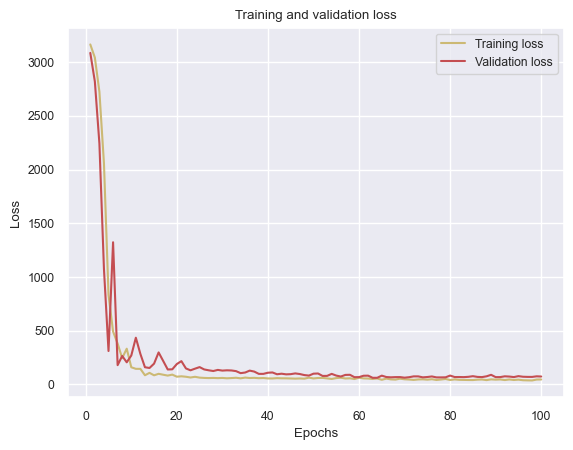

1/1 [==============================] - 0s 33ms/step - loss: 48.1733 - mae: 6.4165

[2th Fold progress]
Epoch 1/100
4/4 [==============================] - 2s 162ms/step - loss: 3127.9792 - mae: 55.5071 - val_loss: 2876.4045 - val_mae: 53.5695
Epoch 2/100
4/4 [==============================] - 0s 22ms/step - loss: 3098.6758 - mae: 55.2455 - val_loss: 2839.1802 - val_mae: 53.2140
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 3080.1543 - mae: 55.0830 - val_loss: 2805.6736 - val_mae: 52.8880
Epoch 4/100
4/4 [==============================] - 0s 21ms/step - loss: 3062.2520 - mae: 54.9229 - val_loss: 2765.4365 - val_mae: 52.4925
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 3032.5959 - mae: 54.6563 - val_loss: 2703.9380 - val_mae: 51.8800
Epoch 6/100
4/4 [==============================] - 0s 23ms/step - loss: 2986.9622 - mae: 54.2306 - val_loss: 2570.4033 - val_mae: 50.5309
Epoch 7/100
4/4 [==============================] - 0s 28ms/step - lo

Epoch 61/100
4/4 [==============================] - 0s 17ms/step - loss: 39.6177 - mae: 6.0776 - val_loss: 106.5985 - val_mae: 7.2764
Epoch 62/100
4/4 [==============================] - 0s 16ms/step - loss: 37.8923 - mae: 5.9053 - val_loss: 91.7796 - val_mae: 7.0486
Epoch 63/100
4/4 [==============================] - 0s 17ms/step - loss: 39.0593 - mae: 5.6601 - val_loss: 86.8699 - val_mae: 6.9905
Epoch 64/100
4/4 [==============================] - 0s 19ms/step - loss: 37.3246 - mae: 5.7461 - val_loss: 101.9208 - val_mae: 7.3899
Epoch 65/100
4/4 [==============================] - 0s 22ms/step - loss: 34.9920 - mae: 5.6403 - val_loss: 99.6695 - val_mae: 7.3713
Epoch 66/100
4/4 [==============================] - 0s 22ms/step - loss: 38.6339 - mae: 5.9889 - val_loss: 101.1080 - val_mae: 7.4497
Epoch 67/100
4/4 [==============================] - 0s 20ms/step - loss: 33.8041 - mae: 5.5418 - val_loss: 75.8408 - val_mae: 6.6978
Epoch 68/100
4/4 [==============================] - 0s 20ms/step -

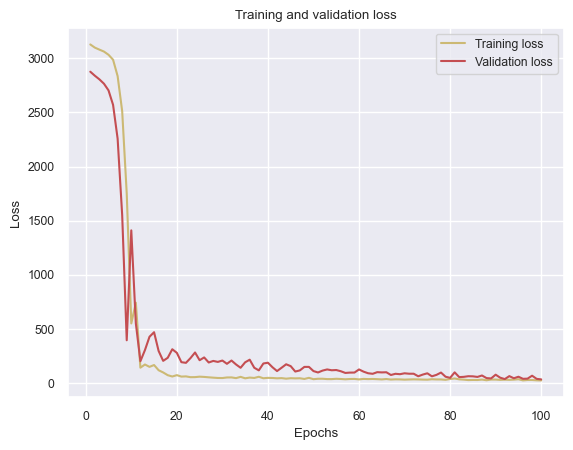

1/1 [==============================] - 0s 32ms/step - loss: 179.3794 - mae: 10.1348

[3th Fold progress]
Epoch 1/100
4/4 [==============================] - 2s 128ms/step - loss: 3237.7336 - mae: 56.3228 - val_loss: 3393.9966 - val_mae: 57.9498
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 3211.7761 - mae: 56.0895 - val_loss: 3381.4741 - val_mae: 57.8401
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 3199.5735 - mae: 55.9845 - val_loss: 3372.2668 - val_mae: 57.7604
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 3190.3801 - mae: 55.9044 - val_loss: 3363.0854 - val_mae: 57.6809
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 3180.6443 - mae: 55.8176 - val_loss: 3353.9131 - val_mae: 57.6013
Epoch 6/100
4/4 [==============================] - 0s 18ms/step - loss: 3171.6121 - mae: 55.7380 - val_loss: 3344.7910 - val_mae: 57.5221
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - 

Epoch 61/100
4/4 [==============================] - 0s 24ms/step - loss: 54.6160 - mae: 6.4645 - val_loss: 85.7039 - val_mae: 8.7804
Epoch 62/100
4/4 [==============================] - 0s 17ms/step - loss: 54.4126 - mae: 6.4216 - val_loss: 85.4793 - val_mae: 8.7765
Epoch 63/100
4/4 [==============================] - 0s 15ms/step - loss: 54.2404 - mae: 6.4270 - val_loss: 85.8941 - val_mae: 8.7794
Epoch 64/100
4/4 [==============================] - 0s 18ms/step - loss: 65.1460 - mae: 7.0760 - val_loss: 95.0724 - val_mae: 8.9282
Epoch 65/100
4/4 [==============================] - 0s 17ms/step - loss: 56.3907 - mae: 6.5150 - val_loss: 84.1733 - val_mae: 8.6917
Epoch 66/100
4/4 [==============================] - 0s 17ms/step - loss: 54.9943 - mae: 6.4544 - val_loss: 82.6229 - val_mae: 8.5951
Epoch 67/100
4/4 [==============================] - 0s 16ms/step - loss: 54.7900 - mae: 6.4054 - val_loss: 84.2402 - val_mae: 8.6788
Epoch 68/100
4/4 [==============================] - 0s 17ms/step - lo

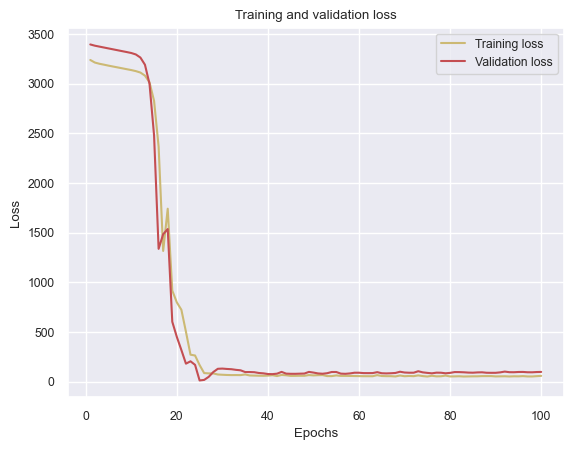

1/1 [==============================] - 0s 30ms/step - loss: 34.8926 - mae: 4.9341

[4th Fold progress]
Epoch 1/100
4/4 [==============================] - 2s 177ms/step - loss: 3184.9011 - mae: 55.9879 - val_loss: 2888.4797 - val_mae: 53.6132
Epoch 2/100
4/4 [==============================] - 0s 32ms/step - loss: 3143.6829 - mae: 55.6295 - val_loss: 2837.9409 - val_mae: 53.1374
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 3099.1204 - mae: 55.2327 - val_loss: 2750.7969 - val_mae: 52.3092
Epoch 4/100
4/4 [==============================] - 0s 19ms/step - loss: 3005.9241 - mae: 54.3641 - val_loss: 2582.0039 - val_mae: 50.6701
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 2826.5352 - mae: 52.6270 - val_loss: 2213.4526 - val_mae: 46.8841
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 2363.6970 - mae: 47.8570 - val_loss: 1464.3347 - val_mae: 37.9490
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - lo

Epoch 61/100
4/4 [==============================] - 0s 20ms/step - loss: 42.1123 - mae: 5.1557 - val_loss: 217.2864 - val_mae: 10.9457
Epoch 62/100
4/4 [==============================] - 0s 20ms/step - loss: 26.3074 - mae: 3.9477 - val_loss: 147.7724 - val_mae: 10.4551
Epoch 63/100
4/4 [==============================] - 0s 19ms/step - loss: 47.0317 - mae: 5.8790 - val_loss: 131.9831 - val_mae: 9.9498
Epoch 64/100
4/4 [==============================] - 0s 18ms/step - loss: 30.9643 - mae: 4.3592 - val_loss: 210.9019 - val_mae: 10.7000
Epoch 65/100
4/4 [==============================] - 0s 18ms/step - loss: 38.7123 - mae: 4.9907 - val_loss: 174.6138 - val_mae: 10.4112
Epoch 66/100
4/4 [==============================] - 0s 18ms/step - loss: 32.8696 - mae: 4.7347 - val_loss: 153.8222 - val_mae: 10.6506
Epoch 67/100
4/4 [==============================] - 0s 19ms/step - loss: 33.5198 - mae: 4.8499 - val_loss: 195.7776 - val_mae: 11.2165
Epoch 68/100
4/4 [==============================] - 0s 1

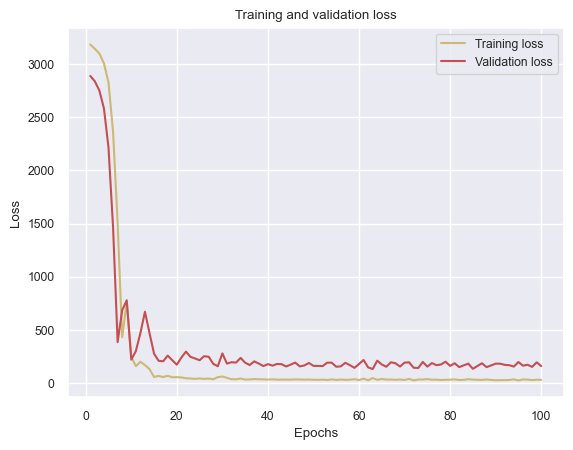

1/1 [==============================] - 0s 42ms/step - loss: 166.1913 - mae: 11.6407

[5th Fold progress]
Epoch 1/100
4/4 [==============================] - 2s 141ms/step - loss: 3251.4827 - mae: 56.4772 - val_loss: 2967.9780 - val_mae: 54.3304
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 3088.3962 - mae: 54.9699 - val_loss: 2618.2627 - val_mae: 50.9049
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 2723.7849 - mae: 51.4239 - val_loss: 1857.8895 - val_mae: 41.9277
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 1739.1943 - mae: 39.3189 - val_loss: 928.3423 - val_mae: 23.5320
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 1134.0603 - mae: 30.6296 - val_loss: 953.8942 - val_mae: 30.3367
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 797.9917 - mae: 25.9736 - val_loss: 487.9051 - val_mae: 21.1783
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss

4/4 [==============================] - 0s 19ms/step - loss: 37.8863 - mae: 4.8688 - val_loss: 79.0118 - val_mae: 5.5571
Epoch 62/100
4/4 [==============================] - 0s 20ms/step - loss: 47.3060 - mae: 5.5785 - val_loss: 60.7358 - val_mae: 5.5094
Epoch 63/100
4/4 [==============================] - 0s 20ms/step - loss: 38.8056 - mae: 5.1276 - val_loss: 56.7538 - val_mae: 6.6634
Epoch 64/100
4/4 [==============================] - 0s 17ms/step - loss: 43.3338 - mae: 5.2096 - val_loss: 62.5313 - val_mae: 5.6442
Epoch 65/100
4/4 [==============================] - 0s 16ms/step - loss: 41.7432 - mae: 5.0582 - val_loss: 63.6693 - val_mae: 5.7671
Epoch 66/100
4/4 [==============================] - 0s 16ms/step - loss: 40.3007 - mae: 4.8827 - val_loss: 72.8043 - val_mae: 5.7787
Epoch 67/100
4/4 [==============================] - 0s 21ms/step - loss: 37.6050 - mae: 4.5448 - val_loss: 72.5696 - val_mae: 6.7523
Epoch 68/100
4/4 [==============================] - 0s 19ms/step - loss: 40.6251 -

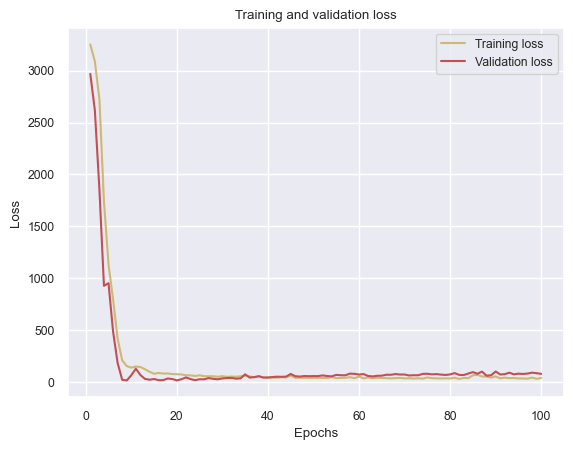

1/1 [==============================] - 0s 45ms/step - loss: 87.4084 - mae: 8.1028


In [53]:
# needs to K-fold cross-valdiation because of small dataset
# K = 5  60% train set 20% validation set 20% test set
from sklearn.model_selection import KFold

K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

lossList, maeList = list(), list()

i = 1;
for train_index, test_index in kf.split(X):
    print(f"\n[{i}th Fold progress]")
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # divide train set into val and train set
    val_ratio = 0.25
    val_size = int(len(X_train) * val_ratio)

    # set indices randomly for val set
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)
    val_indices = indices[:val_size]
    train_indices = indices[val_size:]
    
    X_val = X_train[val_indices]
    y_val = y_train[val_indices]

    X_train = X_train[train_indices]
    y_train = y_train[train_indices]
    
    X_train, X_val, X_test = standardize(X_train, X_val, X_test)
    
    model = buildRNNModel()
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=3, validation_data=(X_val, y_val))
    showGraph(history)
    
    loss, mae = model.evaluate(X_test, y_test)
    lossList.append(loss)
    maeList.append(mae)
    i += 1 

In [55]:
print("Result")
print(f"mseList:{lossList}\nmaeList:{maeList}")
print(f"mse: {sum(lossList)/K}")
print(f"mae: {sum(maeList)/K}")

Result
mseList:[48.173301696777344, 179.37942504882812, 34.892642974853516, 166.1912841796875, 87.408447265625]
maeList:[6.416487693786621, 10.134783744812012, 4.9340972900390625, 11.64066219329834, 8.102836608886719]
mse: 103.20902023315429
mae: 8.24577350616455


## LSTM

In [75]:
#LSTM Model
from keras.layers import LSTM, Dropout, Dense

def buildLSTMModel():
    model = Sequential()

    model.add(LSTM(8, activation="relu", input_shape=(4,1)))
    model.add(Dense(4, activation="relu"))
    model.add(Dense(1))
    model.compile(Adam(learning_rate=0.02), loss = 'mse', metrics = ['mae'])
    return model

model = buildLSTMModel()
model.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 8)                 320       
                                                                 
 dense_92 (Dense)            (None, 4)                 36        
                                                                 
 dense_93 (Dense)            (None, 1)                 5         
                                                                 
Total params: 361 (1.41 KB)
Trainable params: 361 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



[1th Fold progress]
Epoch 1/100
4/4 [==============================] - 2s 145ms/step - loss: 3221.7957 - mae: 56.3019 - val_loss: 3357.7166 - val_mae: 57.4014
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 3206.9062 - mae: 56.1702 - val_loss: 3342.9727 - val_mae: 57.2716
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 3187.3279 - mae: 55.9964 - val_loss: 3322.9856 - val_mae: 57.0924
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 3154.9082 - mae: 55.6952 - val_loss: 3288.3730 - val_mae: 56.7750
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 3077.5391 - mae: 55.0105 - val_loss: 3214.9453 - val_mae: 56.0761
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 2854.1125 - mae: 52.9983 - val_loss: 3007.5449 - val_mae: 53.9654
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 2139.3145 - mae: 45.6366 - val_loss: 2429.9905 - val_mae: 47.1109
Epoch 8/100


4/4 [==============================] - 0s 19ms/step - loss: 38.3758 - mae: 4.6408 - val_loss: 133.1332 - val_mae: 10.3471
Epoch 62/100
4/4 [==============================] - 0s 18ms/step - loss: 39.7804 - mae: 4.8243 - val_loss: 129.5352 - val_mae: 10.2177
Epoch 63/100
4/4 [==============================] - 0s 18ms/step - loss: 39.4014 - mae: 4.6739 - val_loss: 125.7674 - val_mae: 9.7426
Epoch 64/100
4/4 [==============================] - 0s 19ms/step - loss: 38.3084 - mae: 4.6664 - val_loss: 126.3121 - val_mae: 9.9478
Epoch 65/100
4/4 [==============================] - 0s 20ms/step - loss: 39.4154 - mae: 4.7222 - val_loss: 123.6947 - val_mae: 9.7584
Epoch 66/100
4/4 [==============================] - 0s 18ms/step - loss: 42.6565 - mae: 5.0532 - val_loss: 130.7674 - val_mae: 9.9120
Epoch 67/100
4/4 [==============================] - 0s 19ms/step - loss: 38.5684 - mae: 4.8239 - val_loss: 147.2415 - val_mae: 11.0055
Epoch 68/100
4/4 [==============================] - 0s 17ms/step - loss:

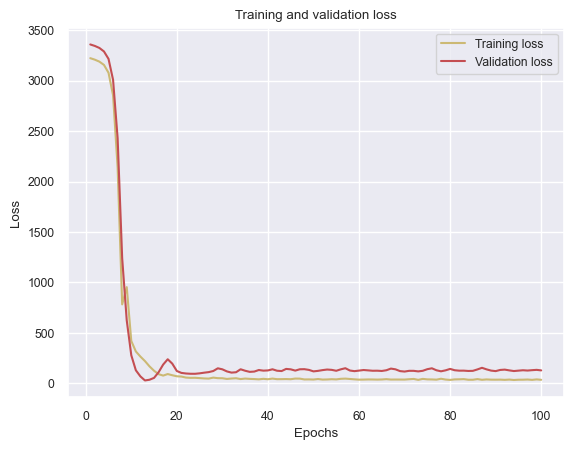

1/1 [==============================] - 0s 31ms/step - loss: 38.8831 - mae: 4.9806

[2th Fold progress]
Epoch 1/100
4/4 [==============================] - 2s 136ms/step - loss: 2909.2400 - mae: 53.5939 - val_loss: 3311.0745 - val_mae: 57.3138
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 2851.1150 - mae: 53.0498 - val_loss: 3191.3352 - val_mae: 56.2562
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 2732.1931 - mae: 51.8887 - val_loss: 2924.6208 - val_mae: 53.8308
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 2498.8586 - mae: 49.5513 - val_loss: 2226.1543 - val_mae: 46.8517
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 1860.3959 - mae: 42.3712 - val_loss: 759.4214 - val_mae: 26.4492
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 643.9768 - mae: 23.3541 - val_loss: 410.6483 - val_mae: 16.1644
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss:

Epoch 61/100
4/4 [==============================] - 0s 16ms/step - loss: 29.5525 - mae: 4.5336 - val_loss: 151.2515 - val_mae: 10.4514
Epoch 62/100
4/4 [==============================] - 0s 17ms/step - loss: 29.1712 - mae: 4.8805 - val_loss: 104.8372 - val_mae: 8.0221
Epoch 63/100
4/4 [==============================] - 0s 19ms/step - loss: 27.9822 - mae: 4.7962 - val_loss: 101.5728 - val_mae: 7.8966
Epoch 64/100
4/4 [==============================] - 0s 18ms/step - loss: 27.4812 - mae: 4.8122 - val_loss: 123.3619 - val_mae: 9.0030
Epoch 65/100
4/4 [==============================] - 0s 18ms/step - loss: 26.7594 - mae: 4.5858 - val_loss: 132.9503 - val_mae: 9.5318
Epoch 66/100
4/4 [==============================] - 0s 18ms/step - loss: 27.2644 - mae: 4.5551 - val_loss: 137.0946 - val_mae: 9.6996
Epoch 67/100
4/4 [==============================] - 0s 21ms/step - loss: 29.5625 - mae: 4.8460 - val_loss: 117.1018 - val_mae: 8.5881
Epoch 68/100
4/4 [==============================] - 0s 19ms/s

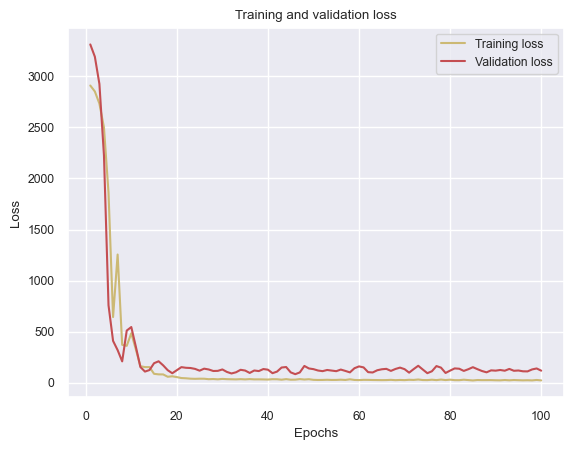

1/1 [==============================] - 0s 34ms/step - loss: 175.2574 - mae: 9.0813

[3th Fold progress]
Epoch 1/100
4/4 [==============================] - 2s 145ms/step - loss: 3230.2957 - mae: 56.2295 - val_loss: 3305.1436 - val_mae: 57.2553
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 3188.9561 - mae: 55.8509 - val_loss: 3247.4946 - val_mae: 56.7496
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 3069.5964 - mae: 54.7746 - val_loss: 3077.0798 - val_mae: 55.2428
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 2589.0071 - mae: 50.0301 - val_loss: 2452.8091 - val_mae: 49.2521
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 1541.7412 - mae: 35.8405 - val_loss: 1132.3928 - val_mae: 29.5599
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 862.9174 - mae: 22.8821 - val_loss: 536.4326 - val_mae: 20.3629
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - los

4/4 [==============================] - 0s 18ms/step - loss: 64.6131 - mae: 6.7558 - val_loss: 44.0578 - val_mae: 5.9573
Epoch 62/100
4/4 [==============================] - 0s 18ms/step - loss: 71.6917 - mae: 6.7724 - val_loss: 34.3186 - val_mae: 5.1106
Epoch 63/100
4/4 [==============================] - 0s 16ms/step - loss: 66.5902 - mae: 6.9586 - val_loss: 29.9052 - val_mae: 4.9376
Epoch 64/100
4/4 [==============================] - 0s 20ms/step - loss: 71.4365 - mae: 7.4413 - val_loss: 27.1005 - val_mae: 4.6650
Epoch 65/100
4/4 [==============================] - 0s 17ms/step - loss: 65.0129 - mae: 7.1397 - val_loss: 37.4439 - val_mae: 5.4625
Epoch 66/100
4/4 [==============================] - 0s 18ms/step - loss: 72.6281 - mae: 6.4772 - val_loss: 48.5254 - val_mae: 6.2174
Epoch 67/100
4/4 [==============================] - 0s 17ms/step - loss: 85.4419 - mae: 7.9939 - val_loss: 27.9593 - val_mae: 4.7847
Epoch 68/100
4/4 [==============================] - 0s 19ms/step - loss: 64.7913 -

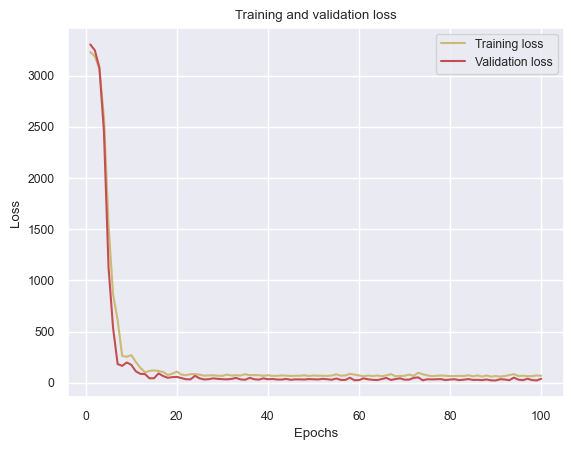

1/1 [==============================] - 0s 31ms/step - loss: 15.8158 - mae: 3.4560

[4th Fold progress]
Epoch 1/100
4/4 [==============================] - 2s 135ms/step - loss: 3273.0420 - mae: 56.8625 - val_loss: 2489.2246 - val_mae: 49.7623
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 3156.9133 - mae: 55.7932 - val_loss: 2347.3975 - val_mae: 48.3078
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 2888.4783 - mae: 53.2674 - val_loss: 1958.4812 - val_mae: 44.0422
Epoch 4/100
4/4 [==============================] - 0s 22ms/step - loss: 2107.0374 - mae: 43.8054 - val_loss: 824.3047 - val_mae: 27.5816
Epoch 5/100
4/4 [==============================] - 0s 21ms/step - loss: 606.9385 - mae: 19.1560 - val_loss: 1025.8665 - val_mae: 26.9691
Epoch 6/100
4/4 [==============================] - 0s 22ms/step - loss: 1841.2972 - mae: 28.1372 - val_loss: 392.0928 - val_mae: 15.3786
Epoch 7/100
4/4 [==============================] - 0s 23ms/step - loss:

Epoch 61/100
4/4 [==============================] - 0s 20ms/step - loss: 22.6217 - mae: 3.4648 - val_loss: 163.2207 - val_mae: 9.5890
Epoch 62/100
4/4 [==============================] - 0s 19ms/step - loss: 21.2463 - mae: 3.3381 - val_loss: 193.8596 - val_mae: 10.4851
Epoch 63/100
4/4 [==============================] - 0s 18ms/step - loss: 19.5257 - mae: 3.5093 - val_loss: 245.5497 - val_mae: 12.3281
Epoch 64/100
4/4 [==============================] - 0s 18ms/step - loss: 21.1449 - mae: 3.7525 - val_loss: 204.6013 - val_mae: 10.5466
Epoch 65/100
4/4 [==============================] - 0s 18ms/step - loss: 20.5608 - mae: 3.4151 - val_loss: 163.1843 - val_mae: 9.4710
Epoch 66/100
4/4 [==============================] - 0s 18ms/step - loss: 18.9486 - mae: 3.3880 - val_loss: 201.8306 - val_mae: 10.5527
Epoch 67/100
4/4 [==============================] - 0s 18ms/step - loss: 19.7906 - mae: 3.4833 - val_loss: 239.6021 - val_mae: 12.0541
Epoch 68/100
4/4 [==============================] - 0s 17

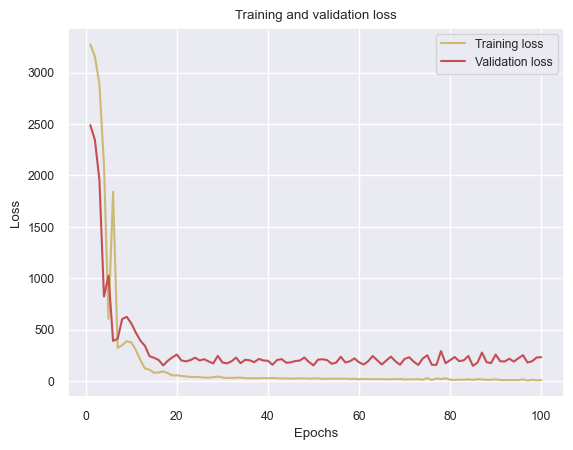

1/1 [==============================] - 0s 38ms/step - loss: 140.6006 - mae: 10.9431

[5th Fold progress]
Epoch 1/100
4/4 [==============================] - 2s 131ms/step - loss: 3375.3523 - mae: 57.6347 - val_loss: 2842.8350 - val_mae: 52.9378
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 3325.4143 - mae: 57.1946 - val_loss: 2723.1506 - val_mae: 51.7143
Epoch 3/100
4/4 [==============================] - 0s 18ms/step - loss: 3237.2532 - mae: 56.4097 - val_loss: 2501.5195 - val_mae: 49.2880
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 3038.4680 - mae: 54.6185 - val_loss: 2092.6816 - val_mae: 44.2814
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 2609.0686 - mae: 50.2255 - val_loss: 1346.7310 - val_mae: 32.8670
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 1472.9131 - mae: 34.3666 - val_loss: 584.2332 - val_mae: 22.7098
Epoch 7/100
4/4 [==============================] - 0s 19ms/step - l

4/4 [==============================] - 0s 20ms/step - loss: 47.7369 - mae: 4.8863 - val_loss: 388.0457 - val_mae: 15.9712
Epoch 61/100
4/4 [==============================] - 0s 20ms/step - loss: 47.5233 - mae: 5.3688 - val_loss: 270.0578 - val_mae: 13.0395
Epoch 62/100
4/4 [==============================] - 0s 19ms/step - loss: 49.2230 - mae: 5.2505 - val_loss: 337.9550 - val_mae: 14.9915
Epoch 63/100
4/4 [==============================] - 0s 20ms/step - loss: 42.4127 - mae: 4.4908 - val_loss: 450.4057 - val_mae: 17.5005
Epoch 64/100
4/4 [==============================] - 0s 23ms/step - loss: 45.3611 - mae: 5.1049 - val_loss: 352.2173 - val_mae: 15.1951
Epoch 65/100
4/4 [==============================] - 0s 22ms/step - loss: 47.7527 - mae: 4.9298 - val_loss: 294.5711 - val_mae: 13.8190
Epoch 66/100
4/4 [==============================] - 0s 27ms/step - loss: 43.0138 - mae: 4.2534 - val_loss: 457.6548 - val_mae: 17.6200
Epoch 67/100
4/4 [==============================] - 0s 24ms/step - l

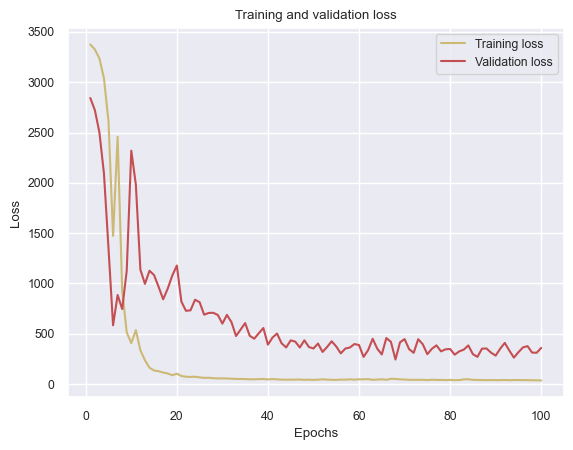

1/1 [==============================] - 0s 31ms/step - loss: 86.4040 - mae: 7.3743


In [76]:
# needs to K-fold cross-valdiation because of small dataset
# K = 5  60% train set 20% validation set 20% test set
from sklearn.model_selection import KFold

K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

lossList, maeList = list(), list()

i = 1;
for train_index, test_index in kf.split(X):
    print(f"\n[{i}th Fold progress]")
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # divide train set into val and train set
    val_ratio = 0.25
    val_size = int(len(X_train) * val_ratio)

    # set indices randomly for val set
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)
    val_indices = indices[:val_size]
    train_indices = indices[val_size:]
    
    X_val = X_train[val_indices]
    y_val = y_train[val_indices]

    X_train = X_train[train_indices]
    y_train = y_train[train_indices]
    
    X_train, X_val, X_test = standardize(X_train, X_val, X_test)
    
    model = buildLSTMModel()
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=3, validation_data=(X_val, y_val))
    showGraph(history)
    
    loss, mae = model.evaluate(X_test, y_test)
    lossList.append(loss)
    maeList.append(mae)
    i += 1 

In [77]:
print("Result")
print(f"mseList:{lossList}\nmaeList:{maeList}")
print(f"mse: {sum(lossList)/K}")
print(f"mae: {sum(maeList)/K}")

Result
mseList:[38.88307571411133, 175.2573699951172, 15.81576156616211, 140.60055541992188, 86.40400695800781]
maeList:[4.980554580688477, 9.081287384033203, 3.4560441970825195, 10.943065643310547, 7.374260902404785]
mse: 91.39215393066407
mae: 7.167042541503906
